In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import scipy


def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './genital_tubercle_figures/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.8.0
scanpy      1.8.2
sinfo       0.3.1
-----
PIL                 9.4.0
anndata             0.8.0
asciitree           NA
backcall            0.2.0
cairo               1.20.0
cffi                1.14.4
cloudpickle         2.0.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dask                2022.02.1
dateutil            2.8.2
decorator           4.4.2
defusedxml          0.7.1
fasteners           0.17.3
fsspec              2022.02.0
google              NA
h5py                3.8.0
igraph              0.10.8
ipykernel           5.4.3
ipython_genutils    0.2.0
jedi                0.18.0
jinja2              3.1.2
joblib              1.2.0
kiwisolver          1.4.4
leidenalg           0.10.1
llvmlite            0.35.0
louvain             0.7.1
markupsafe          2.1.2
matplotlib          3.6.3
mpl_toolkits        NA
msgpack             1.0.3
natsort             8.2.0
numba               0.52.0
numcodecs           0.9.1
numexpr            

'/opt/conda/envs/atac_env/bin/python'

In [2]:
path_to_data = '/nfs/team292/vl6/Mouse_RepTract/Amato2021/'

In [3]:
metadata = {'sample' : ['GSM5324563', 'GSM5324564', 'GSM5324565', 'GSM5324566', 
                       'GSM5324567', 'GSM5324568', 'GSM5324569', 'GSM5324570', 
                       'GSM5324571', 'GSM5324572', 'GSM5324573', 'GSM5324574'],
            'long_sample' : ['GSM5324563_E14.5_male_genitalia_1', 'GSM5324564_E14.5_male_genitalia_2', 
                            'GSM5324565_E14.5_female_genitalia_1', 'GSM5324566_E14.5_female_genitalia_2', 
                            'GSM5324567_E16.5_male_genitalia_1', 'GSM5324568_E16.5_male_genitalia_2', 
                            'GSM5324569_E16.5_female_genitalia_1', 'GSM5324570_E16.5_female_genitalia_2', 
                            'GSM5324571_E18.5_male_genitalia_1', 'GSM5324572_E18.5_male_genitalia_2', 
                            'GSM5324573_E18.5_female_genitalia_1', 'GSM5324574_E18.5_female_genitalia_2'],
           'donor' : ['donor1', 'donor2', 'donor3', 'donor4', 'donor5', 'donor6', 'donor7', 'donor8', 
                     'donor9', 'donor10', 'donor11', 'donor12'], 
           'age' : [14.5, 14.5, 14.5, 14.5, 16.5, 16.5, 16.5, 16.5, 18.5, 18.5, 18.5, 18.5], 
           'sex' : ['male', 'male', 'female', 'female', 'male', 'male', 'female', 'female',
                   'male', 'male', 'female', 'female',], 
           'genotype' : ['Sf1cre_Rosa-tdTomato_Runx1-eGFP', 'Sf1cre_Rosa-tdTomato_Runx1-eGFP', 
                        'Sf1cre_Rosa-tdTomato_Runx1-eGFP', 'Sf1cre_Rosa-tdTomato_Runx1-eGFP', 
                        'Sf1cre_Rosa-tdTomato_Runx1-eGFP', 'Sf1cre_Rosa-tdTomato_Runx1-eGFP', 
                        'Sf1cre_Rosa-tdTomato_Runx1-eGFP', 'Sf1cre_Rosa-tdTomato_Runx1-eGFP', 
                        'Sf1cre_Rosa-tdTomato_Runx1-eGFP', 'Sf1cre_Rosa-tdTomato_Runx1-eGFP', 
                        'Sf1cre_Rosa-tdTomato_Runx1-eGFP', 'Sf1cre_Rosa-tdTomato_Runx1-eGFP']}
metadata = pd.DataFrame.from_dict(metadata)
metadata = metadata.set_index('long_sample')
metadata

sample    donor   age     sex  \
long_sample                                                              
GSM5324563_E14.5_male_genitalia_1    GSM5324563   donor1  14.5    male   
GSM5324564_E14.5_male_genitalia_2    GSM5324564   donor2  14.5    male   
GSM5324565_E14.5_female_genitalia_1  GSM5324565   donor3  14.5  female   
GSM5324566_E14.5_female_genitalia_2  GSM5324566   donor4  14.5  female   
GSM5324567_E16.5_male_genitalia_1    GSM5324567   donor5  16.5    male   
GSM5324568_E16.5_male_genitalia_2    GSM5324568   donor6  16.5    male   
GSM5324569_E16.5_female_genitalia_1  GSM5324569   donor7  16.5  female   
GSM5324570_E16.5_female_genitalia_2  GSM5324570   donor8  16.5  female   
GSM5324571_E18.5_male_genitalia_1    GSM5324571   donor9  18.5    male   
GSM5324572_E18.5_male_genitalia_2    GSM5324572  donor10  18.5    male   
GSM5324573_E18.5_female_genitalia_1  GSM5324573  donor11  18.5  female   
GSM5324574_E18.5_female_genitalia_2  GSM5324574  donor12  18.5  female   

                                                            genotype  
long_sample                                                           
GSM5324563_E14.5_male_genitalia_1    Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324564_E14.5_male_genitalia_2    Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324565_E14.5_female_genitalia_1  Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324566_E14.5_female_genitalia_2  Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324567_E16.5_male_genitalia_1    Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324568_E16.5_male_genitalia_2    Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324569_E16.5_female_genitalia_1  Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324570_E16.5_female_genitalia_2  Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324571_E18.5_male_genitalia_1    Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324572_E18.5_male_genitalia_2    Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324573_E18.5_female_genitalia_1  Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324574_E18.5_female_genitalia_2  Sf1cre_Rosa-tdTomato_Runx1-eGFP

In [4]:
## import reproductive tract utils functions
cwd = '/nfs/team292/vl6/Experiments/Utils'
sys.path.append(cwd)

import reptract_utils
import reptract_genes

In [ ]:
holder = []
for sample in metadata.index:
    print(sample)
    # Load 10x data as AnnData
    holder.append(sc.read_10x_mtx(path_to_data + sample, prefix = sample + '_', cache=True))
    
    # Set names of observation as sample + _ + barcode/probe
    holder[-1].obs_names = [sample+'_'+i.split('-')[0] for i in holder[-1].obs_names]
    # Filer genes expressed in less than 3 cells
    sc.pp.filter_genes(holder[-1], min_cells=3)
    # Filer cells with less than 10 genes expressed
    sc.pp.filter_cells(holder[-1], min_genes=500)
    sc.pp.filter_cells(holder[-1], max_genes=10000)
    # add in metadata
    holder[-1].obs['sample'] = sample
    for val in metadata.columns:
        holder[-1].obs[val] = metadata[val][sample]
    # Extract mitochondial genes
    mito_genes = [name for name in holder[-1].var_names if name.startswith('mt-')]
    #for each cell compute fraction of counts in mito genes vs. all genes
    #the `.A1` is only necessary, as X is sparse - it transform to a dense array after summing
    holder[-1].obs['percent_mito'] = np.sum(
        holder[-1][:, mito_genes].X, axis=1) / np.sum(holder[-1].X, axis=1)
    #add the total counts per cell as observations-annotation to adata
    holder[-1].obs['n_counts'] = holder[-1].X.sum(axis=1)
    print('Total number of cells: {:d}'.format(holder[-1].n_obs))
    print('Total number of genes: {:d}'.format(holder[-1].n_vars))
    # Make diagnostic plots for per-sample quality 
    reptract_utils.qc_plots_sample(holder[-1], sample, '/home/jovyan/RepTract/GENITAL TUBERCLE/genital_tubercle_figures/')

## Preprocessing

In [6]:
for h5 in holder:
    print(h5.obs['sample'][0], h5.shape)

GSM5324563 (8713, 18935)
GSM5324564 (5040, 18794)
GSM5324565 (9595, 19130)
GSM5324566 (9267, 19040)
GSM5324567 (7782, 19316)
GSM5324568 (7727, 19130)
GSM5324569 (8576, 19190)
GSM5324570 (7606, 19077)
GSM5324571 (9531, 19002)
GSM5324572 (9618, 19270)
GSM5324573 (10265, 19245)
GSM5324574 (8798, 19153)


In [7]:
# Filtering 
holder_filtered = []
for adata in holder:
    sc.pp.filter_cells(adata, min_genes = 1500) 
    sc.pp.filter_genes(adata, min_cells = 3)
    adata = adata[adata.obs['percent_mito'] < 0.1, :]
    holder_filtered.append(adata)

filtered out 1051 cells that have less than 1500 genes expressed
filtered out 99 genes that are detected in less than 3 cells
filtered out 1180 cells that have less than 1500 genes expressed
filtered out 138 genes that are detected in less than 3 cells
filtered out 784 cells that have less than 1500 genes expressed
filtered out 79 genes that are detected in less than 3 cells
filtered out 1130 cells that have less than 1500 genes expressed
filtered out 115 genes that are detected in less than 3 cells
filtered out 424 cells that have less than 1500 genes expressed
filtered out 75 genes that are detected in less than 3 cells
filtered out 470 cells that have less than 1500 genes expressed
filtered out 101 genes that are detected in less than 3 cells
filtered out 480 cells that have less than 1500 genes expressed
filtered out 83 genes that are detected in less than 3 cells
filtered out 358 cells that have less than 1500 genes expressed
filtered out 63 genes that are detected in less than 3 

In [8]:
# confirm N samples
print(len(holder_filtered))
# merge datasets
adata = holder_filtered[0].concatenate(holder_filtered[1:],join='outer',index_unique=None, fill_value=0)
# copy of this matrix in Compressed Sparse Row format
import scipy
adata.X = scipy.sparse.csr_matrix(adata.X)
adata

12


AnnData object with n_obs × n_vars = 91100 × 21357
    obs: 'n_genes', 'sample', 'donor', 'age', 'sex', 'genotype', 'percent_mito', 'n_counts', 'batch'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'n_cells-5', 'gene_ids-6', 'feature_types-6', 'n_cells-6', 'gene_ids-7', 'feature_types-7', 'n_cells-7', 'gene_ids-8', 'feature_types-8', 'n_cells-8', 'gene_ids-9', 'feature_types-9', 'n_cells-9'

In [9]:
adata.X.toarray()[1:10, 1:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
adata.obs.head()

n_genes      sample  \
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG     1896  GSM5324563   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT     3651  GSM5324563   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC     4192  GSM5324563   
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG     3247  GSM5324563   
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTGAGGAAA     5768  GSM5324563   

                                                     donor   age   sex  \
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG  donor1  14.5  male   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT  donor1  14.5  male   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC  donor1  14.5  male   
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG  donor1  14.5  male   
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTGAGGAAA  donor1  14.5  male   

                                                                           genotype  \
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG  Sf1cre_Rosa-tdTomato_Runx1-eGFP   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT  Sf1cre_Rosa-tdTomato_Runx1-eGFP   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC  Sf1cre_Rosa-tdTomato_Runx1-eGFP   
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG  Sf1cre_Rosa-tdTomato_Runx1-eGFP   
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTGAGGAAA  Sf1cre_Rosa-tdTomato_Runx1-eGFP   

                                                    percent_mito  n_counts  \
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG      0.035219    4685.0   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT      0.042150   11981.0   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC      0.050048   16804.0   
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG      0.052303    9598.0   
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTGAGGAAA      0.036458   27292.0   

                                                   batch  
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG     0  
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT     0  
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC     0  
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG     0  
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTGAGGAAA     0

In [11]:
metadata

sample    donor   age     sex  \
long_sample                                                              
GSM5324563_E14.5_male_genitalia_1    GSM5324563   donor1  14.5    male   
GSM5324564_E14.5_male_genitalia_2    GSM5324564   donor2  14.5    male   
GSM5324565_E14.5_female_genitalia_1  GSM5324565   donor3  14.5  female   
GSM5324566_E14.5_female_genitalia_2  GSM5324566   donor4  14.5  female   
GSM5324567_E16.5_male_genitalia_1    GSM5324567   donor5  16.5    male   
GSM5324568_E16.5_male_genitalia_2    GSM5324568   donor6  16.5    male   
GSM5324569_E16.5_female_genitalia_1  GSM5324569   donor7  16.5  female   
GSM5324570_E16.5_female_genitalia_2  GSM5324570   donor8  16.5  female   
GSM5324571_E18.5_male_genitalia_1    GSM5324571   donor9  18.5    male   
GSM5324572_E18.5_male_genitalia_2    GSM5324572  donor10  18.5    male   
GSM5324573_E18.5_female_genitalia_1  GSM5324573  donor11  18.5  female   
GSM5324574_E18.5_female_genitalia_2  GSM5324574  donor12  18.5  female   

                                                            genotype  
long_sample                                                           
GSM5324563_E14.5_male_genitalia_1    Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324564_E14.5_male_genitalia_2    Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324565_E14.5_female_genitalia_1  Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324566_E14.5_female_genitalia_2  Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324567_E16.5_male_genitalia_1    Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324568_E16.5_male_genitalia_2    Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324569_E16.5_female_genitalia_1  Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324570_E16.5_female_genitalia_2  Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324571_E18.5_male_genitalia_1    Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324572_E18.5_male_genitalia_2    Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324573_E18.5_female_genitalia_1  Sf1cre_Rosa-tdTomato_Runx1-eGFP  
GSM5324574_E18.5_female_genitalia_2  Sf1cre_Rosa-tdTomato_Runx1-eGFP

In [12]:
barcode_equivalence = {'Male1' : 'GSM5324563_E14.5_male_genitalia_1', 'Female1' : 'GSM5324565_E14.5_female_genitalia_1', 
'Male2' : 'GSM5324564_E14.5_male_genitalia_2', 'Female2' : 'GSM5324566_E14.5_female_genitalia_2', 
'Male3' : 'GSM5324567_E16.5_male_genitalia_1', 'Female3' : ' GSM5324569_E16.5_female_genitalia_1', 
'Male4' : 'GSM5324568_E16.5_male_genitalia_2', 'Female4' : 'GSM5324570_E16.5_female_genitalia_2', 
'Male5' : 'GSM5324571_E18.5_male_genitalia_1', 'Female5' : 'GSM5324573_E18.5_female_genitalia_1', 
'Male6' : 'GSM5324572_E18.5_male_genitalia_2', 'Female6' : 'GSM5324574_E18.5_female_genitalia_2'}


In [13]:
barcode_equivalence

{'Male1': 'GSM5324563_E14.5_male_genitalia_1',
 'Female1': 'GSM5324565_E14.5_female_genitalia_1',
 'Male2': 'GSM5324564_E14.5_male_genitalia_2',
 'Female2': 'GSM5324566_E14.5_female_genitalia_2',
 'Male3': 'GSM5324567_E16.5_male_genitalia_1',
 'Female3': ' GSM5324569_E16.5_female_genitalia_1',
 'Male4': 'GSM5324568_E16.5_male_genitalia_2',
 'Female4': 'GSM5324570_E16.5_female_genitalia_2',
 'Male5': 'GSM5324571_E18.5_male_genitalia_1',
 'Female5': 'GSM5324573_E18.5_female_genitalia_1',
 'Male6': 'GSM5324572_E18.5_male_genitalia_2',
 'Female6': 'GSM5324574_E18.5_female_genitalia_2'}

### Load cell barcode to cell type correspondence shared by Ciro Amato

In [14]:
def load_barcode_celltype_correspondence(filename, equivalence_dict):
    barcodes = pd.read_csv('/home/jovyan/RepTract/GENITAL TUBERCLE/' + filename, index_col = 0)
    barcodes['sample_number'] = [i.split('_')[0] for i in barcodes['cell.barcode']]
    barcodes['cell_barcode'] =  [i.split('_')[1] for i in barcodes['cell.barcode']]
    barcodes['cell_barcode'] = [i.split('-')[0] for i in barcodes['cell_barcode']]
    barcodes['sample'] = barcodes['sample_number'].map(equivalence_dict)
    barcodes['cell.barcode.new'] = barcodes['sample'] + '_' + barcodes['cell_barcode']
    barcodes = barcodes.set_index('cell.barcode.new')
    print(barcodes.shape)
    return barcodes

In [15]:
male_barcodes = load_barcode_celltype_correspondence('Amato2021_male_barcode.csv', barcode_equivalence)
female_barcodes = load_barcode_celltype_correspondence('Amato2021_female_barcode.csv', barcode_equivalence)

(44777, 5)
(44819, 5)


In [16]:
# Convert lists to sets and use the intersection method
common_female_barcodes = list(set(female_barcodes.index.to_list()).intersection(set(adata.obs_names.to_list())))
common_male_barcodes = list(set(male_barcodes.index.to_list()).intersection(set(adata.obs_names.to_list())))
print(len(common_female_barcodes), len(common_male_barcodes))

34282 42360


In [17]:
tot_barcodes = male_barcodes.append(female_barcodes)

In [18]:
tot_barcodes.head()

cluster.name  \
cell.barcode.new                                                                        
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG                  Corpus Cavernsoum   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT         Early Preputial Mesenchyme   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC         Early Preputial Mesenchyme   
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG  Distal Dorsal Glanular Mesenchyme   
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTGAGGAAA           Proliferative Mesenchyme   

                                                                cell.barcode  \
cell.barcode.new                                                               
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG  Male1_AAACCCAAGAAGGTAG-1   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT  Male1_AAACCCAAGTCCCAAT-1   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC  Male1_AAACCCAAGTTTCAGC-1   
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG  Male1_AAACCCACAATGGCAG-1   
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTGAGGAAA  Male1_AAACCCAGTGAGGAAA-1   

                                                   sample_number  \
cell.barcode.new                                                   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG         Male1   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT         Male1   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC         Male1   
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG         Male1   
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTGAGGAAA         Male1   

                                                        cell_barcode  \
cell.barcode.new                                                       
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG  AAACCCAAGAAGGTAG   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT  AAACCCAAGTCCCAAT   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC  AAACCCAAGTTTCAGC   
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG  AAACCCACAATGGCAG   
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTGAGGAAA  AAACCCAGTGAGGAAA   

                                                                               sample  
cell.barcode.new                                                                       
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG  GSM5324563_E14.5_male_genitalia_1  
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT  GSM5324563_E14.5_male_genitalia_1  
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC  GSM5324563_E14.5_male_genitalia_1  
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG  GSM5324563_E14.5_male_genitalia_1  
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTGAGGAAA  GSM5324563_E14.5_male_genitalia_1

In [19]:
adata.obs['celltype'] = adata.obs_names.map(tot_barcodes['cluster.name'].to_dict())

In [20]:
adata.obs['celltype'].value_counts(dropna = False)

NaN                                   14458
Distal Dorsal Glanular Mesenchyme     10276
Proliferative Mesenchyme              10114
Late Proximal Glanular Mesenchyme      8537
Early Proximal Glanular Mesenchyme     8355
Early Ventral Glanular Mesenchyme      7959
Early Preputial Mesenchyme             7529
Corpus Cavernsoum                      6929
Late Preputial Mesenchyme              6710
Sub-Dermal Prepuce                     2315
Late Ventral Glanular Mesenchyme       2183
Endothelium                            1129
Sub-dermal Prepuce                     1035
Epithelium                              856
Melanocyte                              668
Macrophage                              660
Smooth muscle                           563
Preputial gland                         518
Smooth Muscle                           306
Name: celltype, dtype: int64

In [21]:
adata.obs['celltype'] = adata.obs['celltype'].astype(str)

In [22]:
adata = adata[[i != 'nan' for i in adata.obs['celltype']]]

In [23]:
adata.obs['celltype'].value_counts(dropna = False)

Distal Dorsal Glanular Mesenchyme     10276
Proliferative Mesenchyme              10114
Late Proximal Glanular Mesenchyme      8537
Early Proximal Glanular Mesenchyme     8355
Early Ventral Glanular Mesenchyme      7959
Early Preputial Mesenchyme             7529
Corpus Cavernsoum                      6929
Late Preputial Mesenchyme              6710
Sub-Dermal Prepuce                     2315
Late Ventral Glanular Mesenchyme       2183
Endothelium                            1129
Sub-dermal Prepuce                     1035
Epithelium                              856
Melanocyte                              668
Macrophage                              660
Smooth muscle                           563
Preputial gland                         518
Smooth Muscle                           306
Name: celltype, dtype: int64

In [24]:
adata.raw = adata.copy()

In [25]:
# Normalize and log-transform 
adata = reptract_utils.normalize_log_transform(adata)

normalizing by total count per cell
    finished (0:00:04): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


extracting highly variable genes
    finished (0:00:18)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:12)


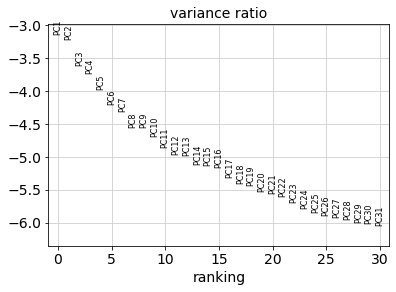

Desired number of PCs to consider for neighbourhood graph:25
computing neighbors
    using 'X_pca' with n_pcs = 25
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:29)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:00)


In [26]:
# HVGs, PCA, KNN & UMAP
adata = reptract_utils.hvgs_pca_umap(adata)

In [27]:
## Eliminate small clusters of doublets 
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, 
                         frameon=True, vector_friendly=True, fontsize=14, figsize=[7,7], color_map=None, 
                         format='pdf', facecolor=None, transparent=False,)

In [ ]:
sc.pl.umap(adata, color = ['donor', 'age', 'sex', 'sample', 'percent_mito', 
                          'n_genes', 'celltype'], color_map = 'OrRd', ncols = 2)

In [29]:
# Cell cycle scoring
cell_cycle_genes = [x.strip() for x in open(file='/nfs/users/nfs_v/vl6/regev_lab_cell_cycle_genes.txt')]
s_genes = cell_cycle_genes[:43]
s_genes = [i.title() for i in s_genes]
print(s_genes)

['Mcm5', 'Pcna', 'Tyms', 'Fen1', 'Mcm2', 'Mcm4', 'Rrm1', 'Ung', 'Gins2', 'Mcm6', 'Cdca7', 'Dtl', 'Prim1', 'Uhrf1', 'Mlf1Ip', 'Hells', 'Rfc2', 'Rpa2', 'Nasp', 'Rad51Ap1', 'Gmnn', 'Wdr76', 'Slbp', 'Ccne2', 'Ubr7', 'Pold3', 'Msh2', 'Atad2', 'Rad51', 'Rrm2', 'Cdc45', 'Cdc6', 'Exo1', 'Tipin', 'Dscc1', 'Blm', 'Casp8Ap2', 'Usp1', 'Clspn', 'Pola1', 'Chaf1B', 'Brip1', 'E2F8']


In [30]:
g2m_genes = cell_cycle_genes[43:]
g2m_genes = [i.title() for i in g2m_genes]
s_genes = [x for x in s_genes if x in adata.var_names]
g2m_genes = [x for x in g2m_genes if x in adata.var_names]

In [31]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes, random_state = 123)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    418 total control genes are used. (0:00:03)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    456 total control genes are used. (0:00:03)
-->     'phase', cell cycle phase (adata.obs)


In [ ]:
sc.pl.umap(adata, color = 'phase')

In [33]:
adata.obs['celltype'] = adata.obs['celltype'].astype('str')

In [ ]:
for i in np.unique(adata.obs['celltype'].to_list()):
    print(i)
    sc.pl.umap(adata, color = ['celltype'], groups = str(i))

In [ ]:
sc.pl.umap(adata, color = ['Foxa1', 'Hoxa13', 'Nr2f2', 'Krt10', 'Isl1', 'Krt14', 
                           'Krt5', 'Upk1a', 'Foxf1', 'Foxf2', 'Sox9', 'Lgr5', 
                          'Wif1', 'Shh', 'Dlx5', 'Wnt2', 'Rdh10', 'Six1', 'Igf1', 'Irx1', 
                          'Irx5', 'Inhba', 'Gap43', 'Shox2', 'Cpa6', 'Wt1', 'Sall1', 'Foxl2', 
                          'Tcf21', 'Cdh8', 'Krtdap', 'Wnt3', 'Dhrs2', 'Upk1a', 'Upk3a'], color_map = 'OrRd', ncols = 3, use_raw = False)

In [36]:
np.unique(adata.obs['celltype'])

array(['Corpus Cavernsoum', 'Distal Dorsal Glanular Mesenchyme',
       'Early Preputial Mesenchyme', 'Early Proximal Glanular Mesenchyme',
       'Early Ventral Glanular Mesenchyme', 'Endothelium', 'Epithelium',
       'Late Preputial Mesenchyme', 'Late Proximal Glanular Mesenchyme',
       'Late Ventral Glanular Mesenchyme', 'Macrophage', 'Melanocyte',
       'Preputial gland', 'Proliferative Mesenchyme', 'Smooth Muscle',
       'Smooth muscle', 'Sub-Dermal Prepuce', 'Sub-dermal Prepuce'],
      dtype=object)

In [48]:
# Keep only epithelial and mesenchymal cells in G1
adata = adata[[i not in ['Smooth muscle', 'Smooth Muscle', 'Macrophage', 'Melanocyte', 'Endothelium', 
                        'Proliferative Mesenchyme'] for i in adata.obs['celltype']]]
adata = adata[[i == 'G1' for i in adata.obs['phase']]]
adata.shape

(61195, 21357)

In [46]:
# Harmonise annotations where there are duplicates 
adata.obs['celltype'] = np.where(adata.obs['celltype'] == 'Sub-dermal Prepuce', 'Sub-Dermal Prepuce',
                                adata.obs['celltype'])

<ipython-input-46-e6d0167397cf>:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['celltype'] = np.where(adata.obs['celltype'] == 'Sub-dermal Prepuce', 'Sub-Dermal Prepuce',


In [ ]:
sc.pl.umap(adata, color = 'celltype')

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


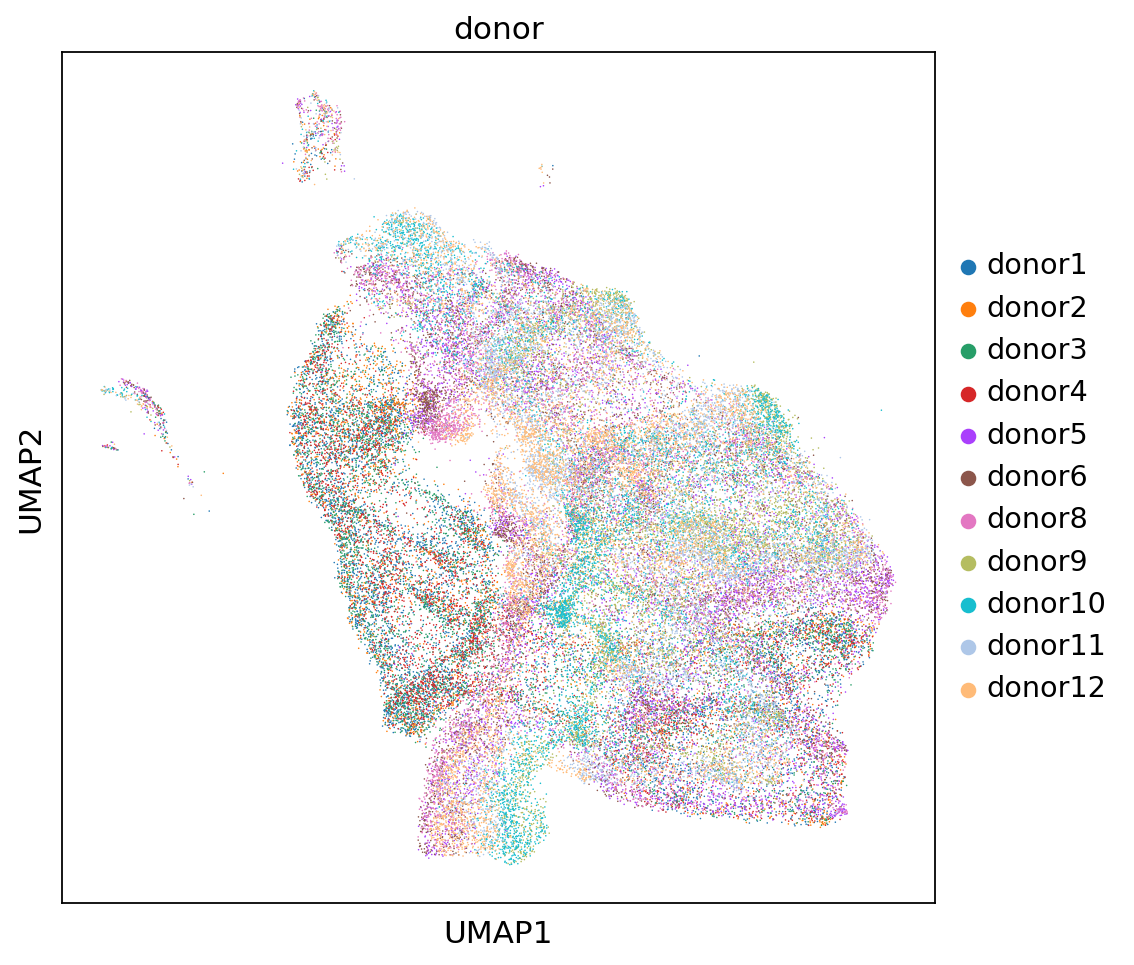

In [50]:
sc.pl.umap(adata, color = 'donor')

## TF-IDF markers per cell type

In [52]:
import anndata
bdata = anndata.AnnData(X = adata.raw.X, var = adata.raw.var, obs = adata.obs)
bdata.shape

(61195, 21357)

In [54]:
import rpy2.rinterface_lib.callbacks
import logging
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

In [55]:
%%R -i bdata
bdata

class: SingleCellExperiment 
dim: 21357 61195 
metadata(0):
assays(1): X
rownames(21357): 0610009O20Rik 1010001N08Rik ... mt-Nd6 tdTomato
rowData names(36): gene_ids.0 feature_types.0 ... feature_types.9
  n_cells.9
colnames(61195): GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG
  GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT ...
  GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCATAGGCT
  GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCATTTCCA
colData names(13): n_genes sample ... G2M_score phase
reducedDimNames(0):
altExpNames(0):


In [56]:
%%R -o mrks

library(SoupX)
counts <- assay(bdata, "X")
colnames(counts) <- colnames(bdata)
rownames(counts) <- rownames(bdata)
mrks = quickMarkers(counts, colData(bdata)$celltype, N = 50) # where clusters is the cell type assignment and 100 means I want the top 100 genes per cluster that pass the hypergeometric test

In [ ]:
cluster = mrks[mrks['cluster'] == 'Preputial gland']['gene'].to_list()[0:15]
sc.pl.umap(adata, color = cluster, color_map = 'OrRd', ncols = 3, use_raw = False)

Markers for preputial gland are clearly immune markers, so remove the cell type and discuss in Methods the rationale for this

In [59]:
adata = adata[[i not in ['Preputial gland'] for i in adata.obs['celltype']]]

In [60]:
adata.shape

(60832, 21357)

In [61]:
np.sum(adata.var['gene_ids-0'].isna())

2521

In [62]:
path_to_data

'/nfs/team292/vl6/Mouse_RepTract/Amato2021/'

## Re-analyse mesenchymal and epithelial cells

In [63]:
import anndata
adata = anndata.AnnData(X = adata.raw.X, var = adata.raw.var, obs = adata.obs)
adata.shape

(60832, 21357)

In [64]:
sc.pp.filter_genes(adata, min_counts = 10)

filtered out 2045 genes that are detected in less than 10 counts


In [65]:
adata.raw = adata.copy()

In [66]:
adata = reptract_utils.normalize_log_transform(adata)

normalizing by total count per cell
    finished (0:00:03): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:08)


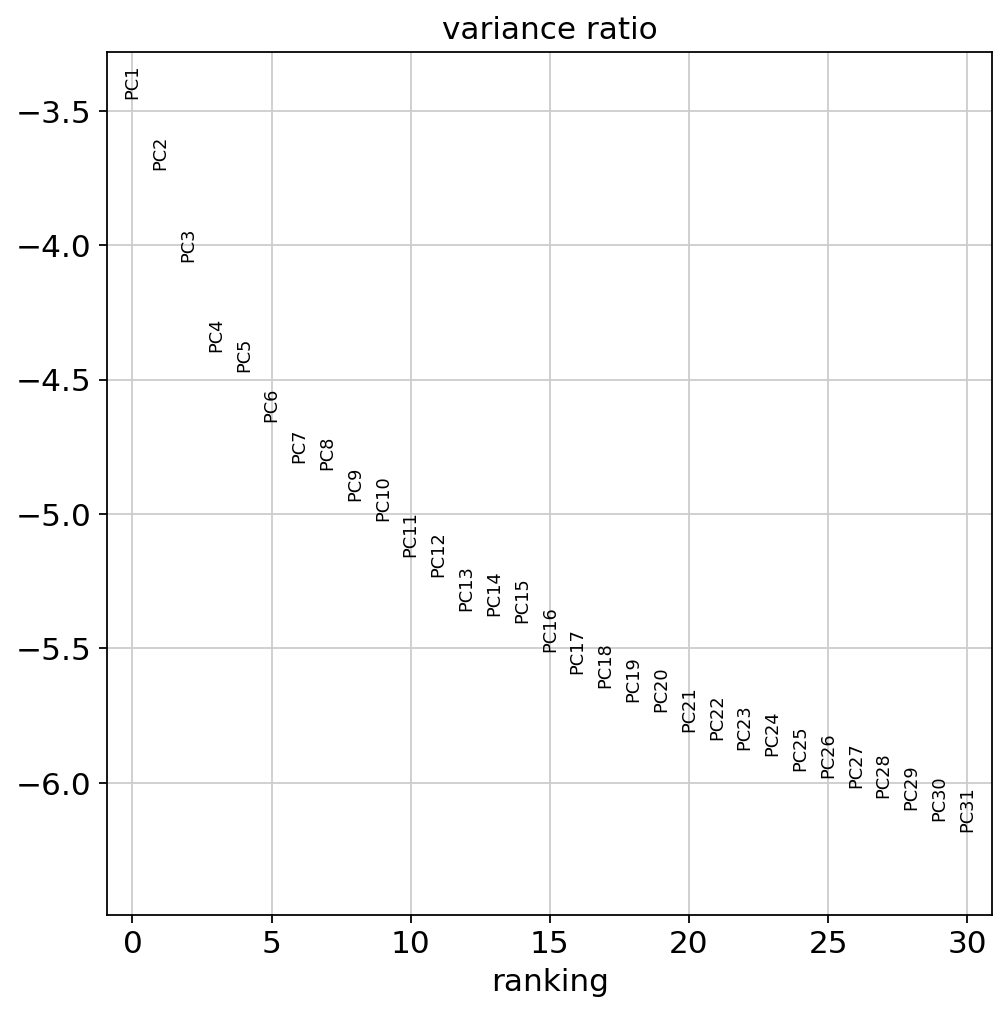

Desired number of PCs to consider for neighbourhood graph:15
computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:39)


In [67]:
adata = reptract_utils.hvgs_pca_umap(adata)

In [ ]:
sc.pl.umap(adata, color = ['donor', 'age', 'sex', 'sample', 'percent_mito', 
                          'n_genes', 'celltype'], color_map = 'OrRd', ncols = 2)

## Harmony integration

In [75]:
# Extract PCA matrix and batch array
n_pcs = 15 # Principal components used to perform dimensionality reduction 
pca = adata.obsm['X_pca'][:, 0:(n_pcs)]
batch = adata.obs['donor'] # Batch ID, in this case stage

In [76]:
import rpy2.rinterface_lib.callbacks
import logging
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [77]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)
set.seed(1000)
hem <- HarmonyMatrix(pca, batch, theta=0, lambda = 6, do_pca=FALSE, verbose = FALSE)  
hem = data.frame(hem)

In [78]:
# Add harmony values to the anndata object --> overwriting PCA 
adata.obsm['X_pca_harmony'] = hem.values 

In [79]:
sc.pp.neighbors(adata, n_pcs = n_pcs, use_rep = 'X_pca_harmony', random_state= 123)
sc.tl.umap(adata, min_dist=0.6, spread = 0.8)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:39)


In [ ]:
sc.pl.umap(adata, color = ['donor', 'age', 'sex', 'sample', 'percent_mito', 
                          'n_genes', 'celltype'], color_map = 'OrRd', ncols = 2)

In [ ]:
sc.pl.umap(adata, color = ['Foxa1', 'Hoxa13', 'Nr2f2', 'Krt10', 'Isl1', 'Krt14', 
                           'Krt5', 'Upk1a', 'Foxf1', 'Foxf2', 'Sox9', 'Lgr5', 
                          'Wif1', 'Shh', 'Dlx5', 'Wnt2', 'Rdh10', 'Six1', 'Igf1', 'Irx1', 
                          'Irx5', 'Inhba', 'Gap43', 'Shox2', 'Cpa6', 'Sall1', 'Foxl2', 'Tcf21'], color_map = 'OrRd', ncols = 3, use_raw = False)

In [ ]:
sc.pl.umap(adata, color = ['Epcam', 'Cdh5', 'Lyve1', 'Cd68', 'Stmn2', 'Plp1', 'Rgs5', 'Myh11', 
                          ], color_map = 'OrRd', ncols = 3, use_raw = False)

In [ ]:
for c in list(np.unique(adata.obs['celltype'])):
    sc.pl.umap(adata, color = ['celltype'], groups = c)

In [ ]:
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = 'leiden', legend_loc = 'on data')

In [ ]:
sc.tl.leiden(adata, resolution = 0.2, restrict_to = ('leiden', ['0']))
sc.pl.umap(adata, color = 'leiden_R', legend_loc = 'on data')

In [ ]:
sc.pl.umap(adata, color = ['leiden_R', 'celltype'], legend_loc = 'on data')

In [100]:
np.unique(adata.obs['celltype'])

array(['Corpus Cavernsoum', 'Distal Dorsal Glanular Mesenchyme',
       'Early Preputial Mesenchyme', 'Early Proximal Glanular Mesenchyme',
       'Early Ventral Glanular Mesenchyme', 'Epithelium',
       'Late Preputial Mesenchyme', 'Late Proximal Glanular Mesenchyme',
       'Late Ventral Glanular Mesenchyme', 'Sub-Dermal Prepuce'],
      dtype=object)

In [106]:
# Harmonise annotations based on clustering 
harmonised_annots = {
    '0,0' : 'Distal Dorsal Glanular Mesenchyme',
    '0,1' : 'Late Proximal Glanular Mesenchyme',
    '1' : 'Preputial Mesenchyme',
    '2' : 'Preputial Mesenchyme',
    '3' : 'Corpus Cavernsoum', 
    '4' : 'Ventral Glanular Mesenchyme', 
    '5' : 'Late Proximal Glanular Mesenchyme', 
    '6' : 'Late Proximal Glanular Mesenchyme', 
    '7' : 'Distal Dorsal Glanular Mesenchyme', 
    '8' : 'Early Proximal Glanular Mesenchyme',
    '9' : 'Ventral Glanular Mesenchyme', 
    '10' : 'Sub-Dermal Prepuce',
    '11' : 'Early Proximal Glanular Mesenchyme', 
    '12' : 'Epithelium'
}
adata.obs['harmonised_celltype'] = adata.obs['leiden_R'].map(harmonised_annots)

In [ ]:
sc.pl.umap(adata, color = 'harmonised_celltype')

In [108]:
adata.write('/nfs/team292/vl6/Mouse_RepTract/Amato2021/Amato2021_mese_epi_annotated.h5ad')

In [110]:
np.unique(adata.obs['harmonised_celltype'])

array(['Corpus Cavernsoum', 'Distal Dorsal Glanular Mesenchyme',
       'Early Proximal Glanular Mesenchyme', 'Epithelium',
       'Late Proximal Glanular Mesenchyme', 'Preputial Mesenchyme',
       'Sub-Dermal Prepuce', 'Ventral Glanular Mesenchyme'], dtype=object)

In [111]:
adata.obs['harmonised_celltype'] = adata.obs['harmonised_celltype'].astype('category')
adata.obs['harmonised_celltype'] = adata.obs['harmonised_celltype'].cat.reorder_categories([
     'Epithelium', 'Distal Dorsal Glanular Mesenchyme', 'Ventral Glanular Mesenchyme', 
    'Early Proximal Glanular Mesenchyme', 'Late Proximal Glanular Mesenchyme', 
    'Corpus Cavernsoum', 'Preputial Mesenchyme',
       'Sub-Dermal Prepuce',
])

In [121]:
color_dict = {
    'Epithelium' : 'mediumorchid', 'Distal Dorsal Glanular Mesenchyme' : 'navy', 
    'Ventral Glanular Mesenchyme' : 'cornflowerblue', 
    'Early Proximal Glanular Mesenchyme' : 'deepskyblue', 'Late Proximal Glanular Mesenchyme' : 'darkturquoise', 
    'Corpus Cavernsoum' : 'mediumspringgreen', 'Preputial Mesenchyme' : 'yellowgreen',
       'Sub-Dermal Prepuce' : 'olivedrab',
}

In [123]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


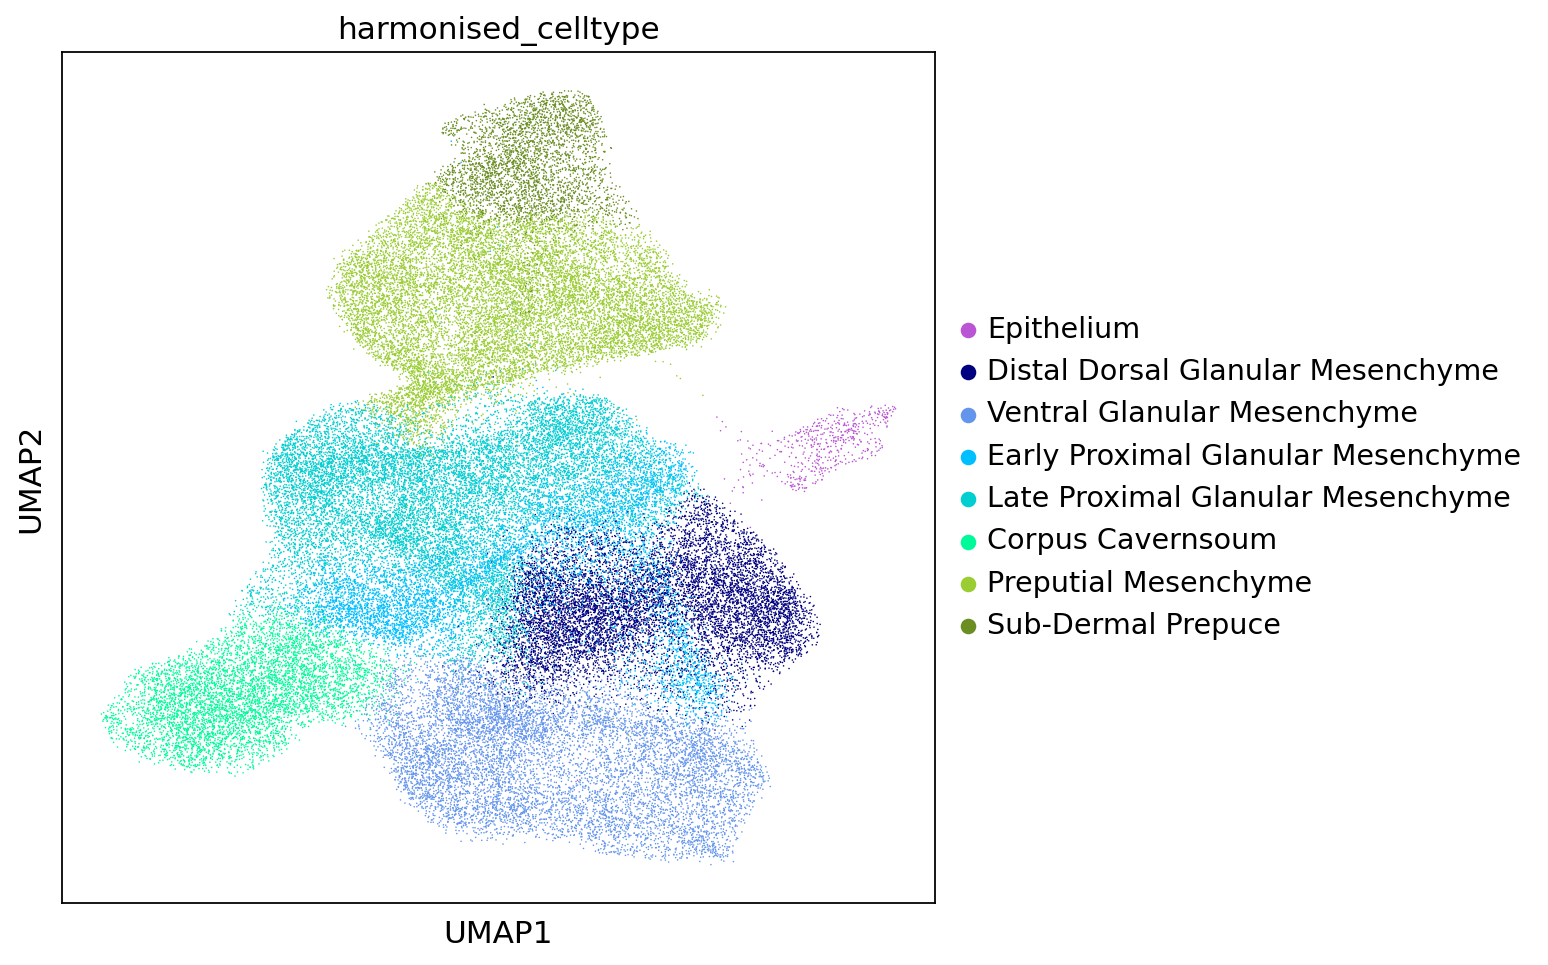

In [124]:
sc.pl.umap(adata, color = 'harmonised_celltype', palette = color_dict, 
          save = '_amato2021_celltype.pdf')

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


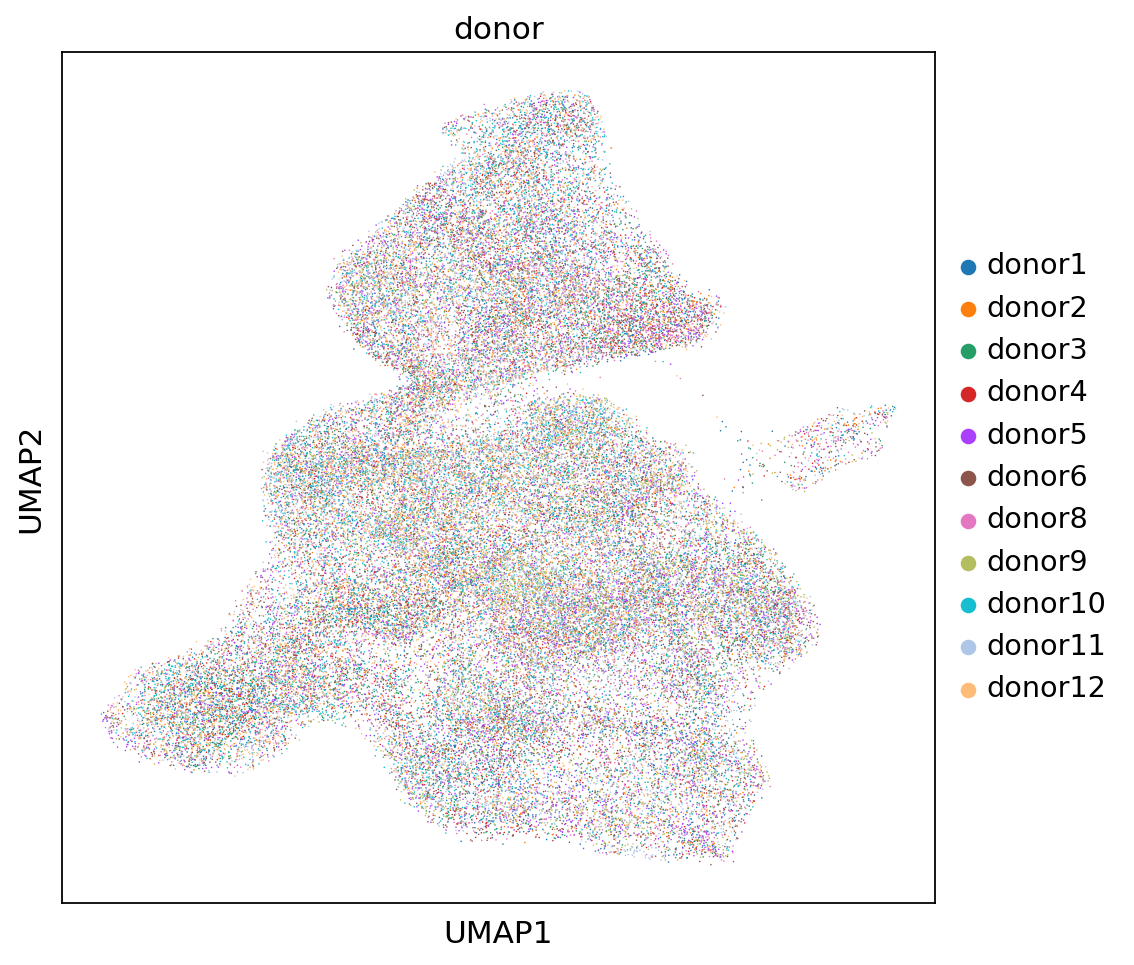

In [125]:
sc.pl.umap(adata, color = 'donor', 
          save = '_amato2021_donor.pdf')

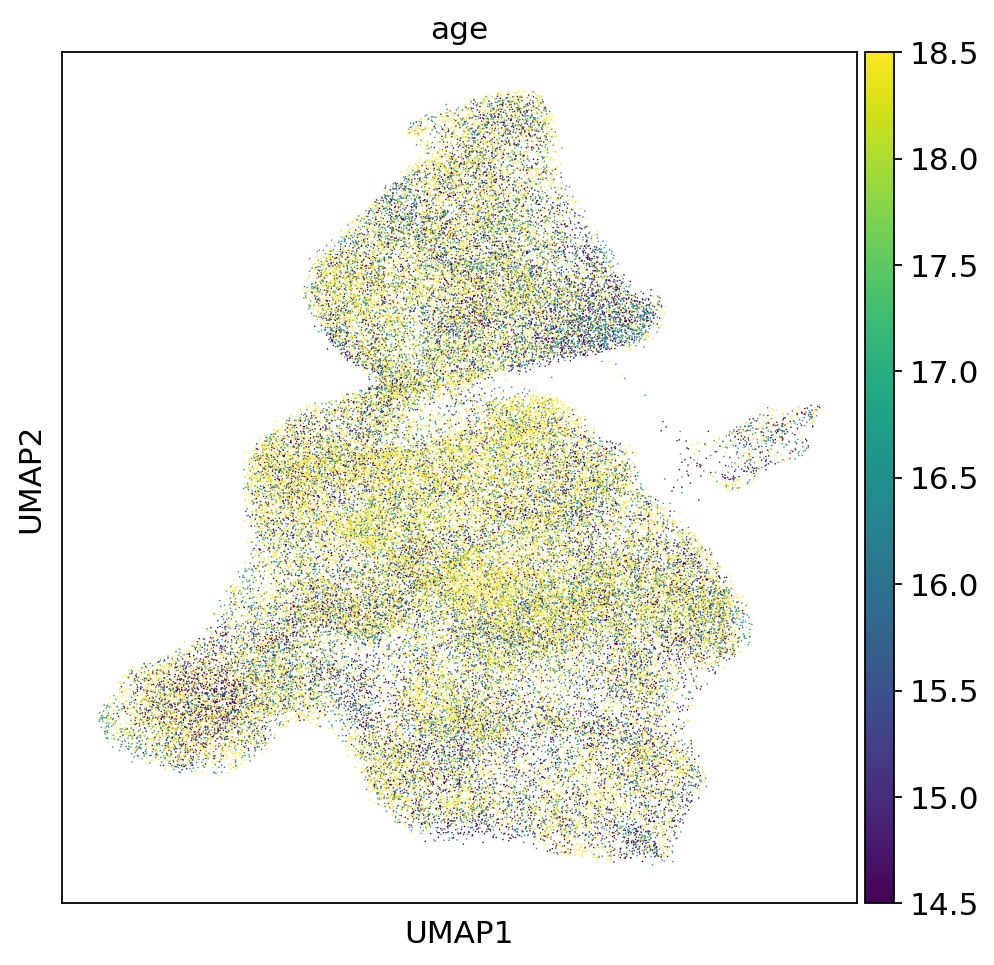

In [126]:
sc.pl.umap(adata, color = 'age', 
          save = '_amato2021_stage.pdf')